In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nengo

In [101]:
D = 4
P = 5
S = 1000
N = 100

radius = np.sqrt(D)   # this could probably be reduced a bit

seed = 1
rng = np.random.RandomState(seed=seed)

inputs = rng.uniform(0, 1, size=(S, D))

ideal = inputs.max(axis=1)

neuron_type = nengo.LIFRate()
model = nengo.Network()
with model:
    stim = nengo.Node(nengo.processes.PresentInput(inputs, presentation_time=0.001))
    
    local = nengo.networks.EnsembleArray(n_neurons=N, n_ensembles=D, neuron_type=neuron_type)
    local.power = local.add_output('power', lambda x: x**P)
    nengo.Connection(stim, local.input, synapse=None)
    norm = nengo.Ensemble(n_neurons=N, dimensions=1, radius=radius, neuron_type=neuron_type)
    nengo.Connection(local.power, norm, transform=np.ones((1, D)), synapse=None)
    output = nengo.Node(None, size_in=1)
    nengo.Connection(norm, output, function=lambda x: x**(1/P), eval_points=nengo.dists.Uniform(0,1), synapse=None)
    
    p_norm = nengo.Probe(norm)
    p_output = nengo.Probe(output)
sim = nengo.Simulator(model)
with sim:
    sim.run_steps(S)
    
    

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

rmse 0.24744818875693625


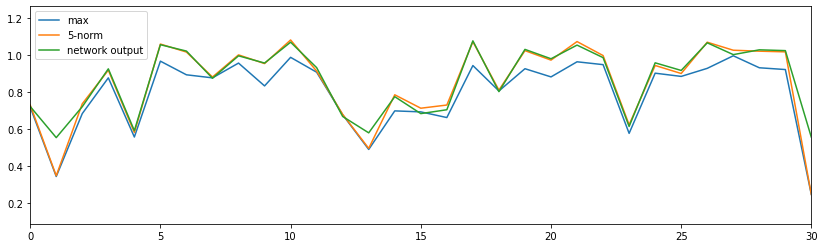

In [102]:
rmse = np.sqrt(np.mean((ideal-sim.data[p_output])**2))
print('rmse', rmse)

plt.figure(figsize=(14,4))
plt.plot(ideal, label='max')
plt.plot(np.linalg.norm(inputs, axis=1, ord=P), label='%d-norm'%P)
plt.plot(sim.data[p_output], label='network output')
plt.xlim(0, 30)
plt.legend()
